In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def lectura_YML(archivoYML):
    Índices = []
    with open (archivoYML, "r") as a:
        for linea in archivoYML:
            l = a.readline()
            if "data: |" in l:
                while "SPECS" or "type" not in l:
                    l = a.readline()
                    if "type" not in l:
                        if "SPECS" not in l:
                            Lambda = l.split( )[0]
                            n = l.split( )[1]
                            Tupla = (Lambda, n)
                            Índices.append(Tupla)
                        else:
                            return Índices
                    else:
                        return Índices
                archivoYML.close()

In [3]:
def func_archivoyml_tuplas(ruta_yml: str) -> list:
    '''
     Lee los archivos yml y devuelve la lista de tuplas
    '''
    f = open(ruta_yml)
    texto_archivo = f.read() #text_archivo es un string de todo lo que contiene el archivo
    f.close()

    # A continuación, note que el texto lo separamos por data: |\n, así como en \nSPECS y - type.
    # Si bien no todos los archivos tienen estos dos últimos strings de terminación, se pueden incluir
    # para buscar el caso más generla
    lista_unprocessed = texto_archivo.split('data: |\n')[1].split('\nSPECS')[0].split('  - type')[0].strip().split('\n        ')
    
    # Acá si gustan pueden darle un print a lista_unprocessed para ver el resultado
    lista_final = []

    for k in lista_unprocessed:
        texto = k.split(' ')
        texto[0] = float(texto[0])
        texto[1] = float(texto[1])
        lista_final.append(tuple(texto))

    return lista_final

In [4]:
a = func_archivoyml_tuplas(r"C:\Users\brune\OneDrive\Documentos\FISI2526-MetCompCompl-202320\Taller_1\Adhesivos\Iezzi.yml")
print (a)

[(0.3, 1.5591248), (0.301, 1.5589504), (0.302, 1.558773), (0.303, 1.5585928), (0.304, 1.5584097), (0.305, 1.558224), (0.306, 1.5580356), (0.307, 1.5578448), (0.308, 1.5576516), (0.309, 1.5574563), (0.31, 1.5572586), (0.311, 1.5570589), (0.312, 1.5568572), (0.313, 1.5566537), (0.314, 1.5564483), (0.315, 1.5562413), (0.316, 1.5560324), (0.317, 1.5558221), (0.318, 1.5556103), (0.319, 1.555397), (0.32, 1.5551823), (0.321, 1.5549664), (0.322, 1.5547494), (0.323, 1.5545311), (0.324, 1.5543116), (0.325, 1.5540912), (0.326, 1.5538698), (0.327, 1.5536475), (0.328, 1.5534244), (0.329, 1.5532004), (0.33, 1.5529757), (0.331, 1.5527502), (0.332, 1.5525241), (0.333, 1.5522975), (0.334, 1.5520701), (0.335, 1.5518425), (0.336, 1.5516142), (0.337, 1.5513855), (0.338, 1.5511565), (0.339, 1.550927), (0.34, 1.5506973), (0.341, 1.5504674), (0.342, 1.5502372), (0.343, 1.5500067), (0.344, 1.5497762), (0.345, 1.5495455), (0.346, 1.5493147), (0.347, 1.5490838), (0.348, 1.5488529), (0.349, 1.548622), (0.35, 1.5

In [5]:
def Gráfica_Índices_kaptón(Lista_de_Tuplas):
    print (Lista_de_Tuplas)
    Lambdas = []
    ns = []
    for i in range(len(Lista_de_Tuplas)):
        Lambdas.append(float(Lista_de_Tuplas[i][0]))
        ns.append(float(Lista_de_Tuplas[i][1]))
    nacumulado = 0
    xmax = ns[0]
    xmin = ns[0]
    for i in range(len(ns)):
        nacumulado += ns[i]
    npromedio = round(nacumulado/len(ns), 2)
    Suma_Para_Desviación = 0
    for i in range(len(ns)):
        Suma_Para_Desviación += (ns[i] - npromedio)**2
    s = round((Suma_Para_Desviación/(len(ns)-1)), 2)
    título = 'Kaptón' + " n promedio: " + str(npromedio) + " Desviación estándar: " + str(s)
    df = pd.DataFrame(data = ns, index = Lambdas, columns = ['índices de refracción'])
    df.plot(kind = "line", legend = False, xlabel="Valores de Lambda(µm)", ylabel="Valores de n")
    plt.title(título)
        


[(0.19, 1.34312), (0.2, 1.46582), (0.21, 1.61203), (0.22, 1.79919), (0.23, 1.92516), (0.24, 2.00683), (0.25, 2.12061), (0.26, 2.0767), (0.27, 2.00353), (0.28, 2.01765), (0.29, 2.09624), (0.3, 2.19452), (0.31, 2.1957), (0.32, 2.14546), (0.33, 2.11443), (0.34, 2.08695), (0.35, 2.05832), (0.36, 2.03094), (0.37, 1.99944), (0.38, 1.97766), (0.39, 1.95942), (0.4, 1.9456), (0.41, 1.93248), (0.42, 1.92005), (0.43, 1.91007), (0.44, 1.90021), (0.45, 1.89071), (0.46, 1.88268), (0.47, 1.87435), (0.48, 1.8662), (0.49, 1.85904), (0.5, 1.85291), (0.51, 1.84727), (0.52, 1.84206), (0.53, 1.83685), (0.54, 1.83256), (0.55, 1.82952), (0.56, 1.82607), (0.57, 1.82293), (0.58, 1.82013), (0.59, 1.81775), (0.6, 1.81497), (0.61, 1.81216), (0.62, 1.81064), (0.63, 1.80807), (0.64, 1.80529), (0.65, 1.80334), (0.66, 1.80122), (0.67, 1.7994), (0.68, 1.79832), (0.69, 1.79648), (0.7, 1.7947), (0.71, 1.79319), (0.72, 1.79208), (0.73, 1.79045), (0.74, 1.78837), (0.75, 1.78793), (0.76, 1.78737), (0.77, 1.78654), (0.78, 1

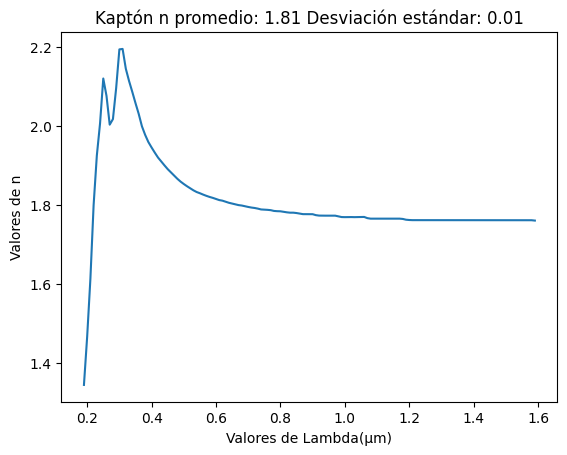

In [6]:
b = Gráfica_Índices_kaptón(func_archivoyml_tuplas(r"C:\Users\brune\OneDrive\Documentos\FISI2526-MetCompCompl-202320\Taller_1\Plásticos_comerciales\French.yml"))

In [7]:
def Gráfica_Índices_NOA138(Lista_de_Tuplas):
    print (Lista_de_Tuplas)
    Lambdas = []
    ns = []
    for i in range(len(Lista_de_Tuplas)):
        Lambdas.append(float(Lista_de_Tuplas[i][0]))
        ns.append(float(Lista_de_Tuplas[i][1]))
    nacumulado = 0
    xmax = ns[0]
    xmin = ns[0]
    for i in range(len(ns)):
        nacumulado += ns[i]
    npromedio = round(nacumulado/len(ns), 2)
    Suma_Para_Desviación = 0
    for i in range(len(ns)):
        Suma_Para_Desviación += (ns[i] - npromedio)**2
    s = round((Suma_Para_Desviación/(len(ns)-1)), 4)
    título = 'NOA138' + " n promedio: " + str(npromedio) + " Desviación estándar: " + str(s)
    df = pd.DataFrame(data = ns, index = Lambdas, columns = ['índices de refracción'])
    df.plot(kind = "line", legend = False, xlabel="Valores de Lambda(µm)", ylabel="Valores de n")
    plt.title(título)

[(0.3, 1.3902956), (0.301, 1.3900723), (0.302, 1.3898512), (0.303, 1.389632), (0.304, 1.3894148), (0.305, 1.3891995), (0.306, 1.3889862), (0.307, 1.3887748), (0.308, 1.3885652), (0.309, 1.3883575), (0.31, 1.3881518), (0.311, 1.3879478), (0.312, 1.3877456), (0.313, 1.3875451), (0.314, 1.3873465), (0.315, 1.3871496), (0.316, 1.3869544), (0.317, 1.386761), (0.318, 1.3865691), (0.319, 1.386379), (0.32, 1.3861905), (0.321, 1.3860037), (0.322, 1.3858185), (0.323, 1.3856348), (0.324, 1.3854527), (0.325, 1.3852721), (0.326, 1.3850932), (0.327, 1.3849157), (0.328, 1.3847398), (0.329, 1.3845654), (0.33, 1.3843924), (0.331, 1.3842208), (0.332, 1.3840507), (0.333, 1.383882), (0.334, 1.3837148), (0.335, 1.383549), (0.336, 1.3833845), (0.337, 1.3832214), (0.338, 1.3830596), (0.339, 1.3828992), (0.34, 1.38274), (0.341, 1.3825822), (0.342, 1.3824258), (0.343, 1.3822705), (0.344, 1.3821166), (0.345, 1.3819638), (0.346, 1.3818123), (0.347, 1.3816621), (0.348, 1.381513), (0.349, 1.3813652), (0.35, 1.3812

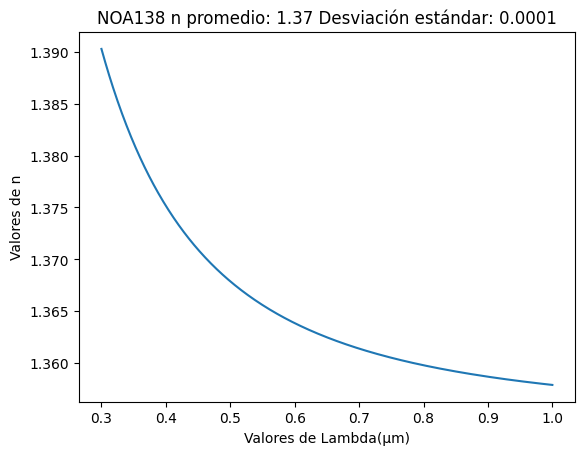

In [8]:
b = Gráfica_Índices_NOA138(func_archivoyml_tuplas(r"C:\Users\brune\OneDrive\Documentos\FISI2526-MetCompCompl-202320\Taller_1\Adhesivos\Iezzi2.yml"))

In [9]:
def Gráfica_Índices(Lista_de_Tuplas):
    print (Lista_de_Tuplas)
    Lambdas = []
    ns = []
    for i in range(len(Lista_de_Tuplas)):
        Lambdas.append(float(Lista_de_Tuplas[i][0]))
        ns.append(float(Lista_de_Tuplas[i][1]))
    nacumulado = 0
    xmax = ns[0]
    xmin = ns[0]
    for i in range(len(ns)):
        nacumulado += ns[i]
    npromedio = nacumulado/len(ns)
    Suma_Para_Desviación = 0
    for i in range(len(ns)):
        Suma_Para_Desviación += (ns[i] - npromedio)**2
    s = (Suma_Para_Desviación/(len(ns)-1))
    Nombre_Material = ""
    
    título = Nombre_Material + " n promedio: " + str(npromedio) + " Desviación estándar: " + str(s)
    df = pd.DataFrame(data = ns, index = Lambdas, columns = ['índices de refracción'])
    df.plot(kind = "line", legend = False, xlabel="Valores de Lambda(µm)", ylabel="Valores de n")
    plt.title(título)